**Install Required Libraries**

In [ ]:
!pip install opencv-contrib-python pandas flask


**Import Libraries**

In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
from datetime import datetime


**Upload Dataset (Images)**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dataset.zip to dataset (1).zip


In [ ]:
!unzip dataset.zip


Archive:  dataset.zip
  inflating: 0_John/img1.jpg         
  inflating: 0_John/img2.jpg         
  inflating: 0_John/img3.jpg         
  inflating: 1_Mary/img1.jpg         
  inflating: 1_Mary/img2.jpg         
  inflating: 1_Mary/img3.jpg         


**Train LBPH Face Recognition Model**

In [ ]:
import zipfile
import os
import cv2
import numpy as np

# Path to zip file
zip_path = "dataset.zip"
dataset_path = "dataset"

# Extract ZIP if not already extracted
if not os.path.exists(dataset_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(dataset_path)
    print("✅ Dataset extracted successfully")

recognizer = cv2.face.LBPHFaceRecognizer_create()

faces = []
labels = []

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)

    if not os.path.isdir(folder_path):
        continue

    # Example folder name: 1_personname
    label = int(folder.split("_")[0])

    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)

        gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if gray is None:
            continue

        faces.append(gray)
        labels.append(label)

recognizer.train(faces, np.array(labels))
recognizer.save("lbph_model.yml")

print("✅ Model trained successfully")


✅ Dataset extracted successfully
✅ Model trained successfully


**Upload Test Image (Attendance Capture)**

In [ ]:
uploaded = files.upload()


Saving restore old black-an.png to restore old black-an.png


**Face Detection & Attendance Marking**

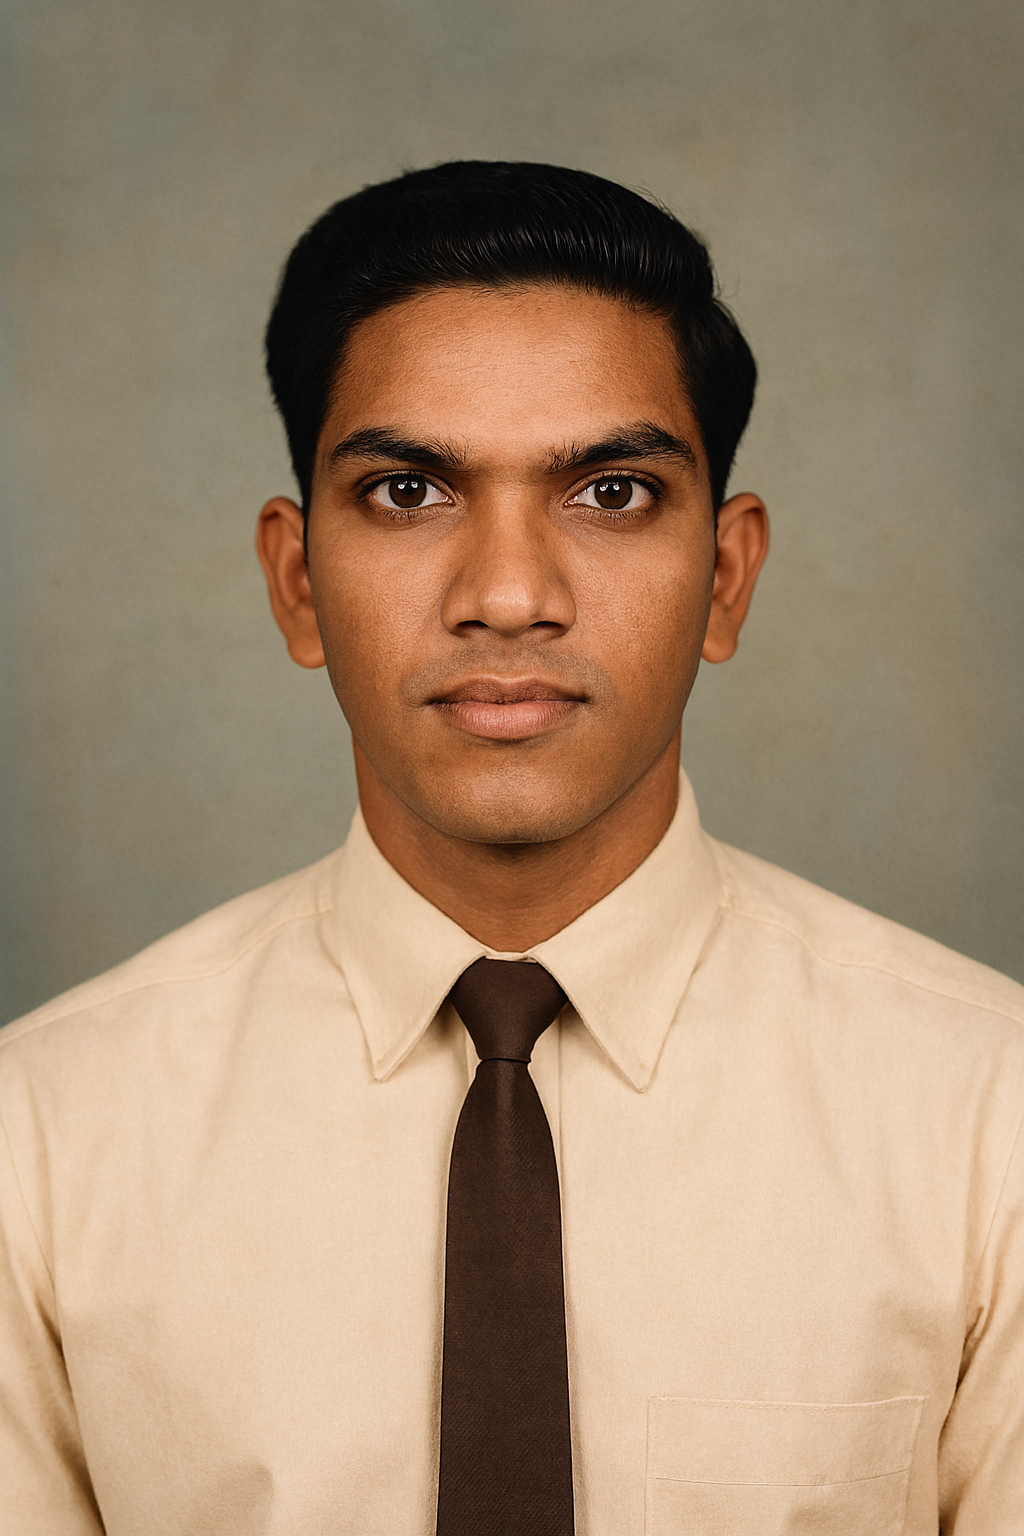

In [ ]:
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

attendance = []

for file in uploaded.keys():
    img = cv2.imread(file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces_detected = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces_detected:
        roi = gray[y:y+h, x:x+w]
        label, confidence = recognizer.predict(roi)

        if confidence < 60:
            time_now = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            attendance.append([label, time_now])

            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
            cv2.putText(img, f"ID {label}", (x,y-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,0,0), 2)

    from google.colab.patches import cv2_imshow
    cv2_imshow(img)


**Save Attendance to Excel (CSV)**

In [ ]:
df = pd.DataFrame(attendance, columns=["ID", "Time"])
df.to_csv("attendance.csv", index=False)
df


,ID,Time


**Download Attendance File**

In [ ]:
files.download("attendance.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>